![alt text](https://funthon.files.wordpress.com/2017/05/bs.png?w=1200)

# Ressources 
doc officiel : https://www.crummy.com/software/BeautifulSoup/bs4/doc/ <br>
https://www.webscraper.io/test-sites

**Quand vous scrappez, essayez de toujours de simuler le comportement d'un humain, un scrappage trop intensif sur un site internet peut le casser. De plus, votre ip pourra être bloquée selon les moyens de protections des sites internet**

In [1]:
from bs4 import BeautifulSoup

## FindAll

In [1]:
# #retourne une liste de toutes les balises "h1"
# h1_brut = soup.findAll('h1')
# print(h1_brut)

# #retourne une liste de toutes les valeurs à l'intérieur des balises "h1"
# liste_h1 = [h1.string for h1 in h1_brut]
# print(liste_h1)

In [2]:
#pareil avec 'p'

# soup.findAll('p')

In [3]:
#si l'on veut sortir ceux d'une classe en particulier, il faut procéder de la manière suivante

# soup.findAll('p', {'class':'travail'})

In [8]:
#si l'on veut sortir ceux de plusieurs class en particulier, il faut procéder de la manière suivante :

# soup.findAll('p',{'class':['travail','texte-h2']})

[<p class="texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>,
 <p class="texte-h2"> "Vivre sans rien faire est pareil à une mort lente" </p>,
 <p class="texte-h2"> "I must spill yet more blood, so the blood already split will not be in vain." </p>,
 <p class="texte-h2"> "Non mais allo quoi"</p>,
 <p class="travail"> Work hard !</p>]

In [4]:
#nous pouvons accéder au titre avec .attrs (! Cela ne fonctionne que sur un élément, notez le find au lieu du findAll)

# soup.find("p",{"id":'outlier'}).attrs['title'] 

In [10]:
BeautifulSoup()

## Select

In [6]:
#Select permet de récupérer des élements par rapport à leur "arborescence"
# x = soup.select('div h2')
#il cherche dans toute les divs les h2


In [7]:
# soup.select('div.block2 h2') #il cherche les h2 dans toute les divs ayant la class block2

In [8]:
# soup.select('div.block2.fin h2') #il cherche les h2 dans toute les divs ayant la class block2 et fin 

In [9]:
#nous pouvons accéder au titre avec .attrs (! Cela ne fonctionne que sur un élément, notez le select_one au lieu du select)
# soup.select_one("#outlier").attrs['title']

In [10]:
# soup.select('div.block1 div p.salaire')

## Exercices

Récupérer toutes les citations

In [16]:
  #class="block1"
x = soup.findAll('p',class_="texte-h2")
citation=[]
for i in x:
    citation.append(i.string)
    print(i.string)

 "Be ashamed to die until you have won some victory for humanity"
 "Vivre sans rien faire est pareil à une mort lente" 
 "I must spill yet more blood, so the blood already split will not be in vain." 
 "Non mais allo quoi"


In [17]:
x# = soup.select('div.block1 h2')
#print(x)
x = soup.find('div', class_="block1").findAll("h2")
author=[]
for i in x:
    author.append(i.string)
    print(i.string)



 Horace Mann 
 Lelouch Vi Britannia 
 Nabilla 


In [18]:
 author
di = {author[0]:citation[0], author[1]:[citation[1], citation[2]], author[2]:citation[3]}
di

{' Horace Mann ': ' "Be ashamed to die until you have won some victory for humanity"',
 ' Lelouch Vi Britannia ': [' "Vivre sans rien faire est pareil à une mort lente" ',
  ' "I must spill yet more blood, so the blood already split will not be in vain." '],
 ' Nabilla ': ' "Non mais allo quoi"'}

créer un dictionnaire avec les noms des auteurs des citations en clés et les citations en valeurs

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
df=pd.DataFrame(di)
df

,Horace Mann,Lelouch Vi Britannia,Nabilla
0,"""Be ashamed to die until you have won some vi...","""Vivre sans rien faire est pareil à une mort ...","""Non mais allo quoi"""
1,"""Be ashamed to die until you have won some vi...","""I must spill yet more blood, so the blood al...","""Non mais allo quoi"""


Calculer la moyenne des salaires (en utilisant regex pour récupérer les salaires, évidemment)

In [20]:
x = soup.findAll('p',class_="salaire")
salaire=[]
for i in x:
    salaire.append(i.string)
    print(i.string)

 "Il est payé 3 €"
 "Il est payé 0€"
 "Elle est payée 3000 €"


In [21]:
import re
valist=[]
for s in salaire:
    va=re.search('[0-9.]+', s).group()
    valist.append(va)
    print(va)

3
0
3000


In [22]:
valist

['3', '0', '3000']

In [23]:
di={'salair':valist}

In [24]:
df=pd.DataFrame(di)
df

,salair
0,3
1,0
2,3000


In [25]:
df["salair"].astype('float32').mean()

1001.0

In [26]:
df['salair'].mean()

101000.0

In [27]:
df.describe

<bound method NDFrame.describe of   salair
0      3
1      0
2   3000>

In [28]:
#soup.findAll('p', {'class':'salaire'})

# Scrapping library internet

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [30]:
url='http://books.toscrape.com/catalogue/category/books_1/index.html'
#url = 'https://books.toscrape.com/catalogue/category/books_1/page-58.html'
ind='index'
page=requests.get('http://books.toscrape.com/catalogue/category/books_1/'+str(ind)+'.html')
print(page.status_code==200)

True


In [31]:
page.content

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    Books | \n     Books to Scrape - Sandbox\n\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="\n    \n" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shor

In [32]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    Books | 
     Books to Scrape - Sandbox

</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    
" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../../../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../../../static/oscar/css/style

In [33]:
tableau=soup.find(title="Soumission")
tableau.string

'Soumission'

In [34]:
len(soup.find('ol').find_all('li'))

20

In [35]:
 soup.find_all("article")[3].find('h3').text

'Sharp Objects'

In [36]:
arti=[]
for x in soup.findAll("article"):
    art=x.find('h3').text
    arti.append(art)
    print(art)
    
len(arti)

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


20

In [37]:
prix=[]
for x in soup.findAll("article"):
    pr=x.find('p',class_="price_color").text.replace('£',"")
    prix.append(pr)
    print(pr)
    
len(prix)

51.77
53.74
50.10
47.82
54.23
22.65
33.34
17.93
22.60
52.15
13.99
20.66
17.46
52.29
35.02
57.25
23.88
37.59
51.33
45.17


20

In [38]:
 soup.find_all("article")[3].find('p',class_="price_color").text.replace('£',"")

'47.82'

In [39]:
 soup.find_all("article")[3].find("p",{'class':"star-rating"}).attrs["class"][1]

'Four'

In [40]:
nota=[]
for x in soup.findAll("article"):
    nt=x.find("p",{'class':"star-rating"}).attrs["class"][1]
    nota.append(nt)
    print(nt)
    
len(nota)

Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


20

In [41]:
 soup.find_all("article")[3].findAll('p',{"class":"instock availability"})[0].text.strip('\n ')

'In stock'

In [42]:
stock=[]
for x in soup.findAll("article"):
    st=x.find('p',{"class":"instock availability"}).text.strip('\n ')
    stock.append(st)
    print(st)
    
len(stock)

In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock


20

In [43]:
di={'titre':arti,'prix':prix,'notation':nota,'disponibilité':stock}
di["prix"]

['51.77',
 '53.74',
 '50.10',
 '47.82',
 '54.23',
 '22.65',
 '33.34',
 '17.93',
 '22.60',
 '52.15',
 '13.99',
 '20.66',
 '17.46',
 '52.29',
 '35.02',
 '57.25',
 '23.88',
 '37.59',
 '51.33',
 '45.17']

In [44]:
df=pd.DataFrame(di)
df["prix"]

0     51.77
1     53.74
2     50.10
3     47.82
4     54.23
5     22.65
6     33.34
7     17.93
8     22.60
9     52.15
10    13.99
11    20.66
12    17.46
13    52.29
14    35.02
15    57.25
16    23.88
17    37.59
18    51.33
19    45.17
Name: prix, dtype: object

In [45]:
i=2
dictio = {'titles': arti, 'notations': nota, 'prices': prix, 'availability': stock}
while (requests.get("http://books.toscrape.com/catalogue/category/books_1/page-"+str(i)+".html").status_code==200):
    page=requests.get("http://books.toscrape.com/catalogue/category/books_1/page-"+str(i)+".html")
    soup=BeautifulSoup(page.content,'html.parser')
    
# LES TITRES DES LIVRES DE CETTE PAGE
    for x in soup.findAll("article"):
        art=x.find('h3').text
        dictio["titles"].append(art)

# LES NOTATIONS DES LIVRES DE CETTE PAGE
    for x in soup.findAll("article"):
        nt=x.find("p",{'class':"star-rating"}).attrs["class"][1]
        dictio["notations"].append(nt)
    
# LES PRIX DES LIVRES DE CETTE PAGE
    for x in soup.findAll("article"):
        pr=x.find('p',class_="price_color").text.replace('£',"")
        dictio["prices"].append(pr)
    
# LES DISPONIBILITES DES LIVRES DE CETTE PAGE
    for x in soup.findAll("article"):
        st=x.find('p',{"class":"instock availability"}).text.strip('\n ')
        dictio["availability"].append(st)
    
    i=i+1


In [46]:
len(dictio["availability"])
import pandas as pd
df = pd.DataFrame(dictio)
df

,titles,notations,prices,availability
0,A Light in the ...,Three,51.77,In stock
1,Tipping the Velvet,One,53.74,In stock
2,Soumission,One,50.10,In stock
3,Sharp Objects,Four,47.82,In stock
4,Sapiens: A Brief History ...,Five,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's ...,One,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 ...",Four,57.06,In stock
997,A Spy's Devotion (The ...,Five,16.97,In stock
998,1st to Die (Women's ...,One,53.98,In stock


In [47]:
#df['prices'].mean()
df

,titles,notations,prices,availability
0,A Light in the ...,Three,51.77,In stock
1,Tipping the Velvet,One,53.74,In stock
2,Soumission,One,50.10,In stock
3,Sharp Objects,Four,47.82,In stock
4,Sapiens: A Brief History ...,Five,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's ...,One,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 ...",Four,57.06,In stock
997,A Spy's Devotion (The ...,Five,16.97,In stock
998,1st to Die (Women's ...,One,53.98,In stock


In [48]:
def check_train(dataframe, head=5):
    print("#####################describe####################")
    print(dataframe.describe())
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_train(df)

#####################describe####################
                          titles notations prices availability
count                       1000      1000   1000         1000
unique                       992         5    903            1
top     Harry Potter and the ...       One  44.18     In stock
freq                           6       226      3         1000
##################### Shape #####################
(1000, 4)
##################### Types #####################
titles          object
notations       object
prices          object
availability    object
dtype: object
##################### Head #####################
                         titles notations prices availability
0            A Light in the ...     Three  51.77     In stock
1            Tipping the Velvet       One  53.74     In stock
2                    Soumission       One  50.10     In stock
3                 Sharp Objects      Four  47.82     In stock
4  Sapiens: A Brief History ...      Five  54.23     In stoc

In [49]:
df["prices"].astype('float32').mean()

35.070369720458984

In [50]:
df.groupby(['prices']).mean() 

C:\Users\tahou\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
prices
10.00
10.01
10.02
10.16
10.23
...
59.90
59.92
59.95


Créer un dataframe qui stock tout les 1000 livres avec comme colonne le titre du livre, sa notation, son prix et sa disponibilité. Il y a actuellement 50 pages mais votre script doit prendre en compte une augmentation future de ce nombre de pages. Bonus si vous faite votre code fait à peut près 20 lignes

In [51]:
import numpy as np
df.dtypes
df["prices"]=df["prices"].astype('float32')
(df.groupby('notations')) ['prices'].agg(np.mean)

notations
Five     35.374489
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810917
Name: prices, dtype: float32

Est-ce que la moyenne des prix des livres notés 1 est différente de la moyenne des prix des livrés notés 5 ? 

In [52]:
#df.groupby(["notations", "prices"]).get_group(("One", "53.74"))

In [53]:
#import numpy as np
#df.dtypes
#df["prices"]=df["prices"].astype('float32')
#(df.groupby('notations')).get_group(["One", "Four"]) ['prices'].agg(np.mean)

Représentez sous forme de camembert la répartition des notes

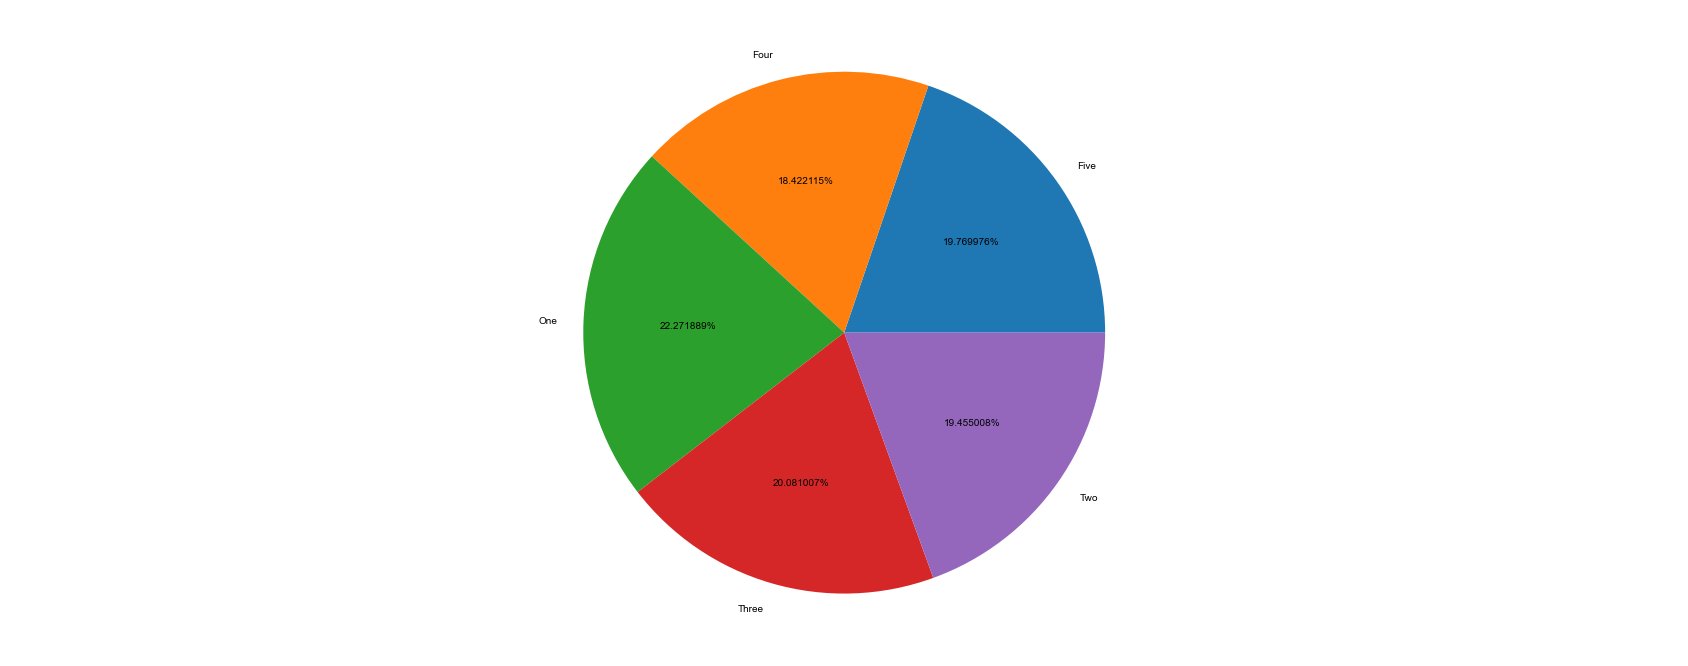

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
from matplotlib.pyplot import pie, axis, show
from matplotlib.pyplot import pie, axis, show
plt.figure(figsize=(20,10))
sums = df.groupby("notations").sum()["prices"]
axis('equal');
pie(sums, labels=sums.index,autopct = "%1f%%" );
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.set(font_scale = 2)
show()
 

In [55]:
#df.notations.plot.pie()

In [56]:
#df.groupby(['prices', 'notations']).size()

# #connection a la  bd mysql

In [112]:
 #requests.get('http://localhost:5000/').json()

In [ ]:
df.to_csv('lib.csv')

In [13]:
import MySQLdb

class Dbconnect(object):

    def __init__(self):

        self.dbconection = MySQLdb.connect(host='localhost',
                                           port=3306,
                                           user='root',
                                           passwd='tahouba12',
                                           db='streamlit')
        self.dbcursor = self.dbconection.cursor()

    def commit_db(self):
        self.dbconection.commit()

    def close_db(self):
        self.dbcursor.close()
        self.dbconection.close()

In [17]:
# db = Dbconnect()
# db.dbcursor.execute('select * from lib where id = 0;')
# results = db.dbcursor.fetchall()
# results = results[0]
# {"index":results[0],"titles":results[1],"notations":results[2],"pieces":results[3],"availability":results[4]}

In [16]:
db = Dbconnect()
db.dbcursor.execute('delete from lib where id =1;')
db.commit_db()

In [ ]:
#db.dbcursor.execute('select * from vente where id = 1;')
#results = db.dbcursor.fetchall()
#for individual_row in results:
    #print(individual_row)

In [ ]:
#affichage
import requests
requests.put('http://localhost:5000/record/9').json()

In [ ]:
#supression
import requests
requests.delete('http://localhost:5000/4')

In [ ]:
# def delete(self):
# db.dbcursor.execute('delete from biens where id_biens=1;')
# results = db.dbcursor.fetchall()
#         del TODOS[todo_id]
#         return '', 204

In [ ]:
!dir

In [ ]:
db = Dbconnect()
req = f'select * from lib'
db.dbcursor.execute(req)
results = db.dbcursor.fetchall()
columns = ["id","titles","notations","prices","availability"]
df = pd.DataFrame(results,columns=columns)
df.set_index("id",inplace = True)
df

In [ ]:
len(results[0])

In [ ]:
df

In [ ]:
db = Dbconnect()

In [ ]:
_id = 0
req = f'insert into lib values({_id},"les miserable","one",50,"In stock")'
db.dbcursor.execute(req)
db.commit_db()

In [ ]:
import requests 


In [ ]:
di = {"_id":1001,"titles":"caps","notations":"one","prices":5675,"availability":"True"}
requests.post("http://127.0.0.1:5000/record/1",json=di)

In [ ]:
requests.get("http://127.0.0.1:5000/record/1001").json()

In [110]:
import requests
import json
_id =16
title_d = "tt"
notations_d = "ttg"
prices_d = 12.4
stock_d = "555"
dii = {"id": _id,"titles":title_d,"notations":notations_d,"prices":prices_d,"availability":stock_d}
requests.put(f"http://127.0.0.1:5000/record/{_id}",json=dii)

<Response [200]>

In [93]:
json.dumps(dii)

'{"id": 15, "titles": "tt", "notations": "ttg", "prices": 12.4, "availability": "555"}'

In [111]:
# vid = dii
# req = f'update lib set titles = "{vid["titles"]}",notations = "{vid["notations"]}", prices = {vid["prices"]}, availability = "{vid["availability"]}" where id = {_id}'
# db.dbcursor.execute(req)
# db.commit_db()
# requests.get("http://127.0.0.1:5000/record/12").json()